<a href="https://colab.research.google.com/github/Rilna-Rejinold/ShapeAI_Bootcamp_BWD/blob/main/HDC_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

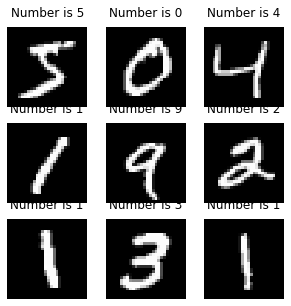

In [3]:
import matplotlib.pyplot as plt
#%matplotlib inline
fig, axis =  plt.subplots(3, 3, figsize=(5,5))
plt.gray()
for i, ax in enumerate(axis.flat):
  ax.matshow(x_train[i])
  ax.axis('off')
  ax.set_title('Number is {}'.format(y_train[i]))
fig.show()

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
print(x_train.ndim)

4


In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation = tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation = tf.nn.softmax))


In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=1)

1875/1875 [==============================] - 33s 17ms/step - loss: 0.2167 - accuracy: 0.9350


In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0824 - accuracy: 0.9747


[0.0824102833867073, 0.9746999740600586]